In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from sklearn.cluster import KMeans

<h1>Aufgabe 1 a)</h1>

In [2]:
mean =[2,-2]
cov = [[0.9,0.2],[0.2,0.3]]

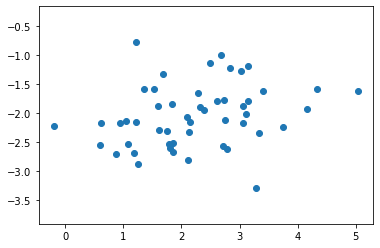

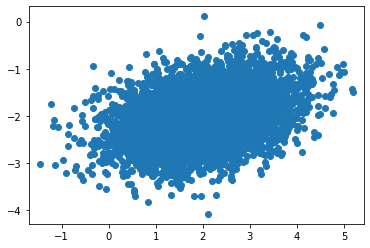

In [3]:
for n_samples in [50, 5000]: 
    X = np.random.multivariate_normal(mean,cov,n_samples)
    plt.scatter(X[:,0], X[:,1])
    plt.axis('equal')
    plt.show()

In [4]:
mean1 = np.mean(X,axis=0)
X_arr = np.array(X)

In [5]:
C = np.cov(X_arr.T)
print(C)

[[0.89095852 0.18725602]
 [0.18725602 0.29763712]]


In [6]:
# C = np.zeros((2, 2))
# dC = np.zeros((2, 2))
# for x in X_arr:
#         d1 = (x[0] - mean1[0])
#         d2 = (x[1] - mean1[1])
#         dC = [[d1*d1, d1*d2],[d1*d2, d2*d2]]
#         C = np.add(C, dC)

# C = C/len(X_arr)
# print(C)
# print(len(X_arr))

<h1>Aufgabe 1 b)</h1>

In [7]:
mean1_exact = [0,0,0]
mean2_exact = [1,2,2]
mean3_exact = [3,3,4]
# cov = 0.8*np.identity(3)
cov = np.array([[0.8,0.2,0.1],[0.2,0.8,0.2],[0.1,0.2,0.8]])
n_samples = 999

In [8]:
D1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
D2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
D3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
D = np.concatenate((D1,D2,D3), axis=0)

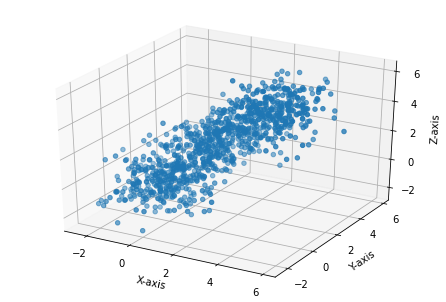

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(D[:,0], D[:,1],D[:,2])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [10]:
mean1 = np.mean(D1,axis=0)
Cov1 = np.cov(D1.T)
mean2 = np.mean(D2,axis=0)
Cov2 = np.cov(D2.T)
mean3 = np.mean(D3,axis=0)
Cov3 = np.cov(D3.T)
Cov_Common = (Cov1 + Cov2 + Cov3)/3
print(mean1)
print(mean2)
print(mean3)
print(Cov_Common)

[-0.03964405 -0.03142319  0.01540367]
[0.97127385 1.98857833 1.91658602]
[2.97125193 2.97484055 4.00013999]
[[0.84624018 0.22779068 0.12094522]
 [0.22779068 0.8232675  0.19389253]
 [0.12094522 0.19389253 0.79464322]]


In [11]:
T1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
T2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
T3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
T = np.concatenate((T1,T2,T3), axis=0)

In [12]:
class_assing = []
n_correct = 0
for x in T:
    d1 = np.linalg.norm(x-mean1)
    d2 = np.linalg.norm(x-mean2)
    d3 = np.linalg.norm(x-mean3)

    m = min(d1,d2,d3)
    if m == d1:
        class_assing.append(1)
    elif m == d2:
        class_assing.append(2)
    elif m == d3:
        class_assing.append(3)

for i in range(len(class_assing)):
    if i < 333:
        if class_assing[i] == 1:
            n_correct +=1
    elif i >= 333 and  i < 666:
        if class_assing[i] == 2:
            n_correct +=1
    elif i >= 666 and  i < 999:
        if class_assing[i] == 3:
            n_correct +=1

correct_frac = n_correct/len(T)
print(correct_frac)

0.9169169169169169


<h1>Aufgabe 2 a)</h1>

In [13]:
mean1_exact = [0,0]
mean2_exact = [3,3]
mean3_exact = [2,6]
cov1_exact = 0.1*np.identity(2)
cov2_exact = 0.2*np.identity(2)
cov3_exact = 0.3*np.identity(2)
n_samples = 600

In [14]:
D1 = np.random.multivariate_normal(mean1_exact,cov1_exact,int(n_samples*0.4))
D2 = np.random.multivariate_normal(mean2_exact,cov2_exact,int(n_samples*0.4))
D3 = np.random.multivariate_normal(mean3_exact,cov3_exact,int(n_samples*0.2))
D = np.concatenate((D1,D2,D3), axis=0)

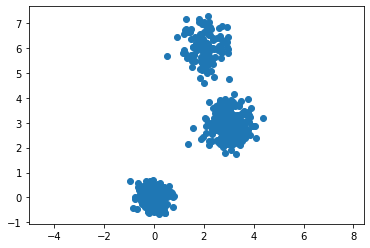

In [15]:
plt.scatter(D[:,0], D[:,1])
plt.axis('equal')
plt.show()

In [16]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag')
gmm.fit(D)

GaussianMixture(covariance_type='diag', n_components=3)

In [17]:
weights = gmm.weights_
print("weights:")
print(weights)

weights:
[0.4        0.40022799 0.19977201]


In [18]:
means = gmm.means_
print("means:")
print(means)

means:
[[2.08773158e-03 3.38975481e-02]
 [2.99881915e+00 2.96804094e+00]
 [2.07910016e+00 6.02467681e+00]]


In [19]:
covs = gmm.covariances_
print("covariances:")
print(covs)

covariances:
[[0.10346489 0.09586038]
 [0.21648102 0.22305023]
 [0.23001529 0.31916261]]


In [20]:
gmm_rand = mixture.GaussianMixture(n_components=3, covariance_type='diag', init_params='random')
gmm_rand.fit(D)

GaussianMixture(covariance_type='diag', init_params='random', n_components=3)

In [21]:
print("weights:")
print(gmm_rand.weights_)
print("means:")
print(gmm_rand.means_)
print("covariances:")
print(gmm_rand.covariances_)

weights:
[0.34108955 0.33811904 0.32079141]
means:
[[1.52260353 2.2486348 ]
 [1.65485837 2.48868003]
 [1.67557228 2.48310246]]
covariances:
[[2.06268968 5.11958798]
 [1.99249273 5.25080279]
 [2.00171349 5.14424726]]


<h1> Aufgabe 3 </h1>

In [22]:
mean1_exact = [0,0]
mean2_exact = [10,0]
mean3_exact = [0,6]
mean4_exact = [9,8]
cov1_exact = np.identity(2)
cov2_exact = [[1,0.2],[0.2,1.5]]
cov3_exact = [[1,0.4],[0.4,1.1]]
cov4_exact = [[0.3,0.2],[0.2,0.5]]
n_samples = 1000

In [23]:
D1 = np.random.multivariate_normal(mean1_exact,cov1_exact,int(n_samples*0.25))
D2 = np.random.multivariate_normal(mean2_exact,cov2_exact,int(n_samples*0.25))
D3 = np.random.multivariate_normal(mean3_exact,cov3_exact,int(n_samples*0.25))
D4 = np.random.multivariate_normal(mean4_exact,cov4_exact,int(n_samples*0.25))
D = np.concatenate((D1,D2,D3,D4), axis=0)

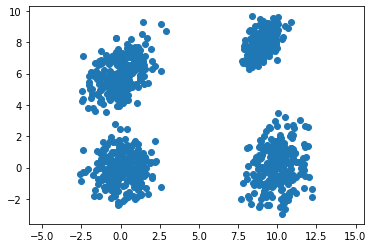

In [24]:
plt.scatter(D[:,0], D[:,1])
plt.axis('equal')
plt.show()

[[ 9.96510295e+00  1.33843122e-01]
 [ 6.44542754e-02 -7.21985035e-02]
 [-6.42313451e-03  6.00208125e+00]
 [ 9.05663555e+00  7.99627499e+00]]


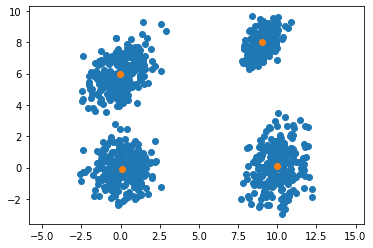

In [25]:
kmeans = KMeans(n_clusters=4, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()

[[9.00648076 8.00372199]
 [0.01828193 2.9287695 ]
 [9.96510295 0.13384312]]


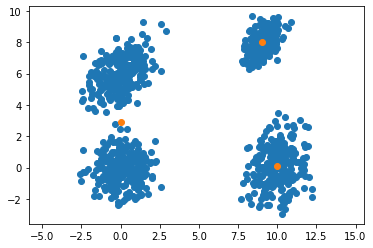

In [26]:
kmeans = KMeans(n_clusters=3, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()

[[ 9.05663555e+00  7.99627499e+00]
 [ 6.44542754e-02 -7.21985035e-02]
 [-6.42313451e-03  6.00208125e+00]
 [ 9.78988119e+00 -1.01633970e+00]
 [ 1.01073119e+01  1.06732483e+00]]


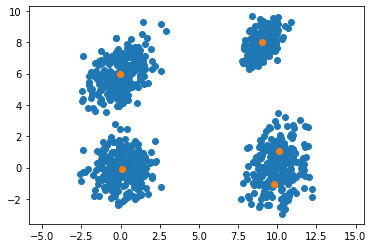

In [27]:
kmeans = KMeans(n_clusters=5, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()